# Stats 141B - Lecture 5

January 20, 2022

### Announcement

* HW2 due two weeks February 2nd @ 23:59pm

### Last time

* numpy and pandas 
* Static Visualizations: matplotlib, plotnine, and seaborn


### Today 

* numpy for statistical models


### Data sets

* Red wine quality data (_winequality-red.csv_)
* Life satisfaction and GDP per capita (_[oecd_bli_2015.csv](https://github.com/ageron/handson-ml/tree/master/datasets/lifesat)_) and (_gdp_per_capita.csv_)

_Note. Materials are from Prof. James Sharpnack's old teaching notes for STA 141B (see lecture 7)_

### Statistical Inference

* Estimation and prediction - classical models, semi-/nonparametric models, high-dimensional models, time series/spatial models, etc
* Uncertainty quantification - Bootstrap, MCMC, Variational methods
* Testing - A/B testing, multiple testing, p-value
* Causal inference

_The first three based on Giné & Nickl's book: Mathematical Foundations of Infinite-Dimensional Statistical Models. 2016. Cambridge University Press_

_Causal inference, read the book by Judea Pearl & Dana Mackenzie, 2018. The Book of Why: The New Science of Cause and Effect._ 

### Machine Learning  (Learning from data)

* Supervised learning - classification, regression
* Unsupervised learning - clustering (K-means), dimension reduction (PCA, factor analysis)

Deep learning - machine learning methods focus on artificial neural networks

_Free statistical machine learning book: Hastie, Tibshirani & Friedman, The Elements of Statistical Learning. 2nd Edition_

### Machine Learning in Numpy 

__Scikit-learn__: https://scikit-learn.org/stable/


* Simple and efficient tools for predictive data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable

__statsmodels__: https://www.statsmodels.org/stable/index.html

* provides classes and functions for the estimation of many different statistical models
* conducting statistical tests and statistical data exploration

### Statistical inference vs. Prediction

- statistical inference: is this effect significant? is the model correct? etc.
- prediction: does this algorithm predict the response variable well?
- supervised learning: predicting one variable from many others (regression models)

### Terms
- *Predictor* variables: X variables
- *Response* variable: Y variable
- ``X``: $n \times p$ design matrix / features
- ``Y``: $n$ label vector


#### Reading the red wine quality data

In [45]:
# list file - using "!" means that you want to call a system command (terminal)

!ls -l data/winequality-red.csv

-rw-rw-r--@ 1 poning  staff  84199 Nov  7  2018 data/winequality-red.csv


In [47]:
#check the head  

!head -5 data/winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6


Wine dataset description
- 84199 bytes (not large, feel free to load into memory)
- header with quotations " in the text
- each line has floats without quotations
- each datum separated by ;

#### Read data as np.array - a different approach to read data

In [48]:
# method 1 to read data

with open('data/winequality-red.csv','r') as winefile: # 'r'-read data (default)
    header = winefile.readline()
    wine_list = [line.strip().split(';') for line in winefile]

In [49]:
type(wine_list)

list

In [50]:
import numpy as np

In [51]:
wine_ar = np.array(wine_list,dtype=np.float64)
type(wine_ar)

numpy.ndarray

In [52]:
header

'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n'

In [53]:
names = [name.strip('"') for name in header.strip().split(';')]
print(names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [56]:
#Subselect the predictor X and response y
y = wine_ar[:,-1]
X = wine_ar[:,:-1]
n,p = X.shape
print(n)
print(p)

1599
11


In [57]:
print(y.shape)
print(X.shape) #checking the dimension

(1599,)
(1599, 11)


In [58]:
import statsmodels.api as sm

X = np.hstack((np.ones((n,1)),X)) #add intercept
wine_ols = sm.OLS(y,X) #Initialize the OLS 
wine_res = wine_ols.fit() # ols fitting

In [59]:
wine_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 20 Jan 2022   Prob (F-statistic):          1.79e-145
Time:                        11:03:49   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9652     21.195      1.036      0.300     -19.607      63.538
x1             0.0250      0.026      0.963      0.336      -0.026       0.076
x2            -1.0836      0.121     -8.948      0.000      -1.321      -0.846
x3            -0.1826      0.147     -1.240      0.215      -0.471       0.106
x4             0.0163      0.015      1.089      0.276      -0.013       0.046
x5            -1.8742      0.419     -4.470      0.000      -2.697      -1.052
x6             0.0044      0.002      2.009      0.045       0.000       0.009
x7            -0.0033      0.001     -4.480      0.000      -0.005      -0.002
x8           -17.8812     21.633     -0.827      0.409     -60.314      24.551
x9            -0.4137      0.192     -2.159      0.031      -0.789      -0.038
x10            0.9163      0.114      8.014      0.000       0.692       1.141
x11            0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Read data using pandas, do OLS with pandas

In [63]:
import pandas as pd
# wine_pd = pd.read_csv("data/winequality-red.csv")
# wine_pd.head()

# try this 
wine_pd = pd.read_csv("data/winequality-red.csv", sep = ";")
wine_pd.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
wine_pd.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [64]:
wine_pd.shape

(1599, 12)

In [66]:
y_pd = wine_pd["quality"]
X_pd = wine_pd.drop(columns = ["quality"])

In [67]:
print(X_pd.shape)
print(y_pd.shape)

(1599, 11)
(1599,)


In [68]:
X_pd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [18]:
X_pd.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0


In [69]:
# import statsmodels.api as sm 

X_pd['intercept'] = np.ones(X_pd.shape[0]) # add intercept

# X = np.hstack((np.ones((n,1)),X)) #add intercept
# wine_ols = sm.OLS(y,X) #Initialize the OLS 
# wine_res = wine_ols.fit() # ols fitting

In [70]:
X_pd.head() # check data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,intercept
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0


In [71]:
# fit ols model
wine_pd_ols = sm.OLS(y_pd,X_pd) #Initialize the OLS 
wine_pd_res = wine_pd_ols.fit() # ols fitting

In [72]:
wine_pd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 20 Jan 2022   Prob (F-statistic):          1.79e-145
Time:                        11:12:43   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
intercept               21.9652     21.195      1.036      0.300     -19.607      63.538
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__sklearn__ also provide a build-in function for fitting linear models

In [23]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_pd, y_pd)

print(reg.coef_)

[ 2.49905527e-02 -1.08359026e+00 -1.82563948e-01  1.63312698e-02
 -1.87422516e+00  4.36133331e-03 -3.26457970e-03 -1.78811638e+01
 -4.13653144e-01  9.16334413e-01  2.76197699e-01  0.00000000e+00]


### Linear model

$$\hat y_i = \hat\beta_0 + \sum_{j=1}^p \hat\beta_j x_{i,j}$$

### Inference in linear models

- statistically test for significance of effects
- requires normality assumptions, homoscedasticity, linear model is correct
- hard to obtain significance for individual effect under colinearity

### Prediction perspective

- think of OLS as a black-box model for predicting $Y | X$
- how do we evaluate performance of prediction?
- how do we choose between multiple OLS models?


Cross validation

Takes $p$-dimensional data $x = (x_1, \ldots, x_p)$ and predicts $y \in \mathcal Y$. 

- *Task:* **Predict** $y$ given $x$ as $\hat y$
- *Performance Metric:* **Loss** measured with some function $\ell(\hat y,y)$
- *Experience:* **Fit** the model with training data $\{x_i,y_i\}_{i=1}^{n_0}$

### Linear Regression

- **Fit**: Compute $\hat \beta$ from OLS with training data $\{x_i,y_i\}_{i=1}^{n_0}$
- **Predict**: For a new predictor $x_{n+1}$ predict $$\hat y = \hat \beta_0 + \sum_{j=1}^p \hat \beta_j x_j$$
- **Loss**: Observe new response $y_{n+1}$ and see loss $$\ell(\hat y,y_{n+1}) = (\hat y - y_{n+1})^2$$

Here, we need to import the necessary packages
This is based on the notebook file [01 in Aurélien Geron's github page](https://github.com/ageron/handson-ml)

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### Life satisfaction and GDP per capita data

In [75]:
# oecd_bli = pd.read_csv("data/oecd_bli_2015.csv")

datapath = "data/"
# oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv")
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value") 
# reshaped DataFrame organized by given index / column values.

oecd_bli.columns

oecd_bli.head(n=10)
# oecd_bli["Life satisfaction"].head() # look at life satisfaction

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


In [76]:
# read gdp per capita data (from http://goo.gl/j1MSKe => imf.org)
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a") # thousands separator ","
gdp_per_capita = gdp_per_capita.rename(columns={"2015": "GDP per capita"})
gdp_per_capita = gdp_per_capita.set_index("Country")

gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [79]:
# merge two datasets

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats = full_country_stats.sort_values(by="GDP per capita")

# full_country_stats.head()
full_country_stats.tail()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,16.06,88.0,94.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",52114.165,2015.0
United States,18.0,1.5,8.3,0.1,89.0,11.30,67.0,5.2,41355.0,145769.0,...,14.27,68.0,85.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",55805.204,2015.0
Norway,16.0,3.3,8.1,0.3,82.0,2.82,75.0,0.6,33492.0,8797.0,...,15.56,78.0,94.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0
Switzerland,20.0,4.2,8.4,0.0,86.0,6.72,80.0,0.5,33491.0,108823.0,...,14.98,49.0,96.0,17.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",80675.308,2015.0
Luxembourg,12.0,4.3,6.0,0.1,78.0,3.47,66.0,0.4,38951.0,61765.0,...,15.12,91.0,86.0,15.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",101994.093,2014.0


Text(0.5, 1.0, 'Life Satisfaction Index')

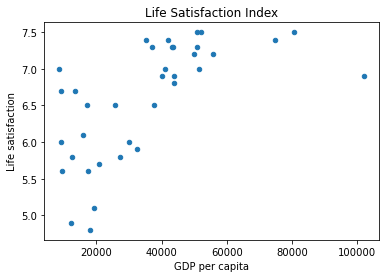

In [80]:
_ = full_country_stats.plot("GDP per capita",'Life satisfaction',kind='scatter')
plt.title('Life Satisfaction Index')

In [81]:
def fit(X,Y):
    """fit the OLS from training w/o intercept"""
    lin1 = LinearRegression(fit_intercept=True) # OLS from sklearn
    lin1.fit(X,Y) # fit OLS
    return np.append(lin1.intercept_,lin1.coef_) # return betahat

def predict(x, betahat):
    """predict for point x"""
    return betahat[0] + x @ betahat[1:]

def loss(yhat,y):
    """sqr error loss"""
    return (yhat - y)**2

In [82]:
keepvars = full_country_stats.dtypes[full_country_stats.dtypes == float].index.values
keepvars = keepvars[:-1] # remove "Estimates Start After"
country = full_country_stats[keepvars]
country.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3,8669.998
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,16193.0,77.0,1.0,66.0,417.0,13.89,63.0,67.0,14.4,9009.280
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,12239.894


In [83]:
country.columns.values
Y = np.array(country['Life satisfaction'])
del country['Life satisfaction'] # another way to drop variable
# or X = country.drop(['Life satisfaction'])
X_vars = country.columns.values
X = np.array(country)
X.shape

(36, 24)

### Training-test split

Simulate the fit/predict/loss:
- randomly split data into training and test set
- fit on training set
- predict on each X datum on test set
- observe losses of predicted Y and test Y's

In [84]:
n = X.shape[0]

In [103]:
## randomly shuffle data and split
# np.random.seed(1)

Ind = np.arange(n) 
np.random.shuffle(Ind)  # random shuffle index
train_size = 2 * n // 3 + 1 # set training set size (//: Floor division) 3 fold cross validation
X_tr, X_te = X[Ind[:train_size],:], X[Ind[train_size:],:] # x training data, x test data
Y_tr, Y_te = Y[Ind[:train_size]], Y[Ind[train_size:]] # y training data, y test data

In [98]:
X_tr.shape

(25, 11)

In [99]:
X_te.shape

(11, 11)

In [104]:
## compute losses on test set
betahat = fit(X_tr,Y_tr)
Y_hat_te = [predict(x,betahat) for x in X_te]
test_losses = [loss(yhat,y) for yhat,y in zip(Y_hat_te,Y_te)]

## compute losses on train set
Y_hat_tr = [predict(x,betahat) for x in X_tr]
train_losses = [loss(yhat,y) for yhat,y in zip(Y_hat_tr,Y_tr)]

In [88]:
train_losses

[2.0194839173657902e-26,
 9.997707568409015e-26,
 6.184669496932733e-28,
 5.750795999061176e-26,
 5.566202547239459e-27,
 4.319802316990261e-27,
 0.0,
 9.663546088957395e-28,
 4.930380657631324e-28,
 1.7749370367472766e-28,
 4.930380657631324e-28,
 1.6547461892278032e-25,
 8.047170094159541e-27,
 9.119232064354896e-28,
 2.8477878678478526e-26,
 1.7279209267961043e-26,
 7.5809532991739235e-28,
 1.5683343656698936e-26,
 1.0055144530918157e-24]

In [89]:
test_losses

[0.23755080870476272,
 0.7977983151176232,
 0.007960270844816719,
 0.004168996829651823,
 0.07939167577196206,
 2.4811878611154925,
 1.1567919231551151,
 1.1628345294433209,
 1.0255126183742882,
 1.3016881718567532,
 1.4420796075096545,
 0.013304576158050965,
 0.8183379305683609,
 0.20701361074783764,
 0.02245044048183491,
 2.035800486576899,
 0.960860441706488]

In [105]:
print("train avg loss: {}\ntest avg loss: {}".format(np.mean(train_losses), np.mean(test_losses)))

train avg loss: 0.10103251041331314
test avg loss: 2.542343502217585


In [40]:
X_tr.shape

(19, 24)

In [93]:
def train_test_split(X,Y,split_pr = 0.5):
    """train-test split"""
    n,p = X.shape
    Ind = np.arange(n) 
    np.random.shuffle(Ind) 
    train_size = int(split_pr * n) # set training set size
    X_tr, X_te = X[Ind[:train_size],:], X[Ind[train_size:],:]
    Y_tr, Y_te = Y[Ind[:train_size]], Y[Ind[train_size:]]
    return (X_tr,Y_tr), (X_te, Y_te)

In [94]:
Y = wine_ar[:,-1]
X = wine_ar[:,:-1]
(X_tr,Y_tr), (X_te, Y_te) = train_test_split(X,Y)

In [95]:
## compute losses on test set
betahat = fit(X_tr,Y_tr)
Y_hat_te = [predict(x,betahat) for x in X_te]
test_losses = [loss(yhat,y) for yhat,y in zip(Y_hat_te,Y_te)]

## compute losses on train set
Y_hat_tr = [predict(x,betahat) for x in X_tr]
train_losses = [loss(yhat,y) for yhat,y in zip(Y_hat_tr,Y_tr)]

In [96]:
print("train avg loss: {}\ntest avg loss: {}".format(np.mean(train_losses), np.mean(test_losses)))

train avg loss: 0.3935516891994589
test avg loss: 0.44719279353567387
